In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [148]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [149]:
df.shape

(13320, 12)

In [150]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Lat,Lon,Nearby_Metro
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,12.846351,77.669098,No
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,12.895768,77.867101,No
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.905568,77.545544,No
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,13.002669,77.491542,No
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,13.061360,77.649389,No


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   Lat           11949 non-null  float64
 10  Lon           11949 non-null  float64
 11  Nearby_Metro  13320 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.2+ MB


In [152]:
df.describe()

,bath,balcony,price,Lat,Lon
count,13247.000000,12711.000000,13320.000000,11949.000000,11949.000000
mean,2.692610,1.584376,112.565627,12.962486,77.630923
std,1.341458,0.817263,148.971674,0.138958,0.158083
min,1.000000,0.000000,8.000000,12.695014,76.108564
25%,2.000000,1.000000,50.000000,12.908945,77.580061
50%,2.000000,2.000000,72.000000,12.955257,77.630364
75%,3.000000,2.000000,120.000000,13.011019,77.670188
max,40.000000,3.000000,3600.000000,17.734263,83.278304


In [153]:
# from geopy.geocoders import Nominatim
# from geopy.distance import geodesic
# import time, os, pickle

# # --- Cache Setup ---
# CACHE_FILE = "geo_cache.pkl"
# cache = pickle.load(open(CACHE_FILE, "rb")) if os.path.exists(CACHE_FILE) else {}
# geo = Nominatim(user_agent="geo_app")

# def get_latlon(place):
#     if place in cache:
#         return cache[place]
#     try:
#         loc = geo.geocode(place)
#         if loc:
#             coords = (loc.latitude, loc.longitude)
#             cache[place] = coords
#             with open(CACHE_FILE, "wb") as f: pickle.dump(cache, f)
#             time.sleep(1)
#             return coords
#     except:
#         return None
#     return None

# def geo_df(df, col):
#     df[["Lat", "Lon"]] = df[col].apply(
#         lambda x: pd.Series(get_latlon(f"{x}, Bengaluru"))
#     )
#     return df

# def near_check(lat, lon, metro_df, radius=2):
#     # Check if the house location is valid
#     if pd.isna(lat) or pd.isna(lon):
#         return "No"

#     for _, r in metro_df.iterrows():
#         # Check if the metro station location is valid before calculating distance
#         if pd.isna(r["Lat"]) or pd.isna(r["Lon"]):
#             continue  # Skip to the next metro station if coordinates are missing

#         if geodesic((lat, lon), (r["Lat"], r["Lon"])).km <= radius:
#             return "Yes"

#     return "No"

# # --- Use ---
# metro_df = pd.read_csv("Namma_Metro_stations(Bengaluru).csv")
# df       = pd.read_csv("Housing_with_metro.csv")

# # metro_df = geo_df(metro_df, "Station Name (English)")
# # df       = geo_df(df, "location")

# df["Nearby_Metro"] = df.apply(lambda r: near_check(r["Lat"], r["Lon"], df), axis=1)

# df.to_csv("Housing_with_metro.csv", index=False)
# print("✅ Done! Missing locations marked as 'No'. File saved.")


In [154]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [155]:
df = df.drop(['society', 'balcony'], axis=1, errors='ignore')

df.head()

,area_type,availability,location,size,total_sqft,bath,price,Lat,Lon,Nearby_Metro
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,12.846351,77.669098,No
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,12.895768,77.867101,No
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,12.905568,77.545544,No
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,13.002669,77.491542,No
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,13.061360,77.649389,No


In [156]:
# df = df.dropna()
# print(df.shape)


In [157]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1306,), dtype=object)

In [158]:
df['location'] = df['location'].fillna(df['location'].mode)

<Axes: ylabel='bath'>

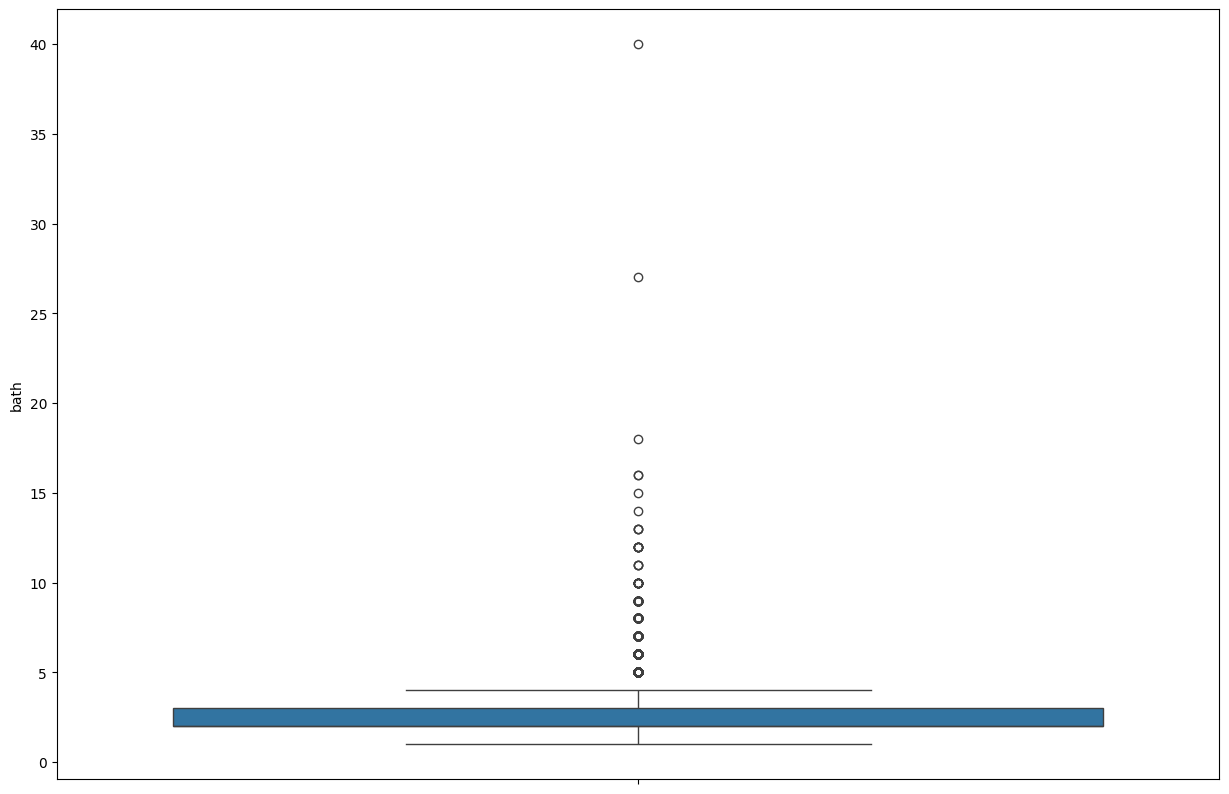

In [159]:
sns.boxplot(df['bath'])

In [160]:
# df['bath'] = df['bath'].fillna(df['bath'].median)

In [161]:
def extract_bhk(x):
    try:
        return int(str(x).split(' ')[0])   # works for '2 BHK', '3 Bedroom', '1 RK'
    except:
        return None

# Extract BHK
df['bhk'] = df['size'].apply(extract_bhk)
df['bhk'] = df['bhk'].fillna(df['bhk'].median())



In [162]:
# Cap bhk at 10
df['bhk'] = df['bhk'].apply(lambda x: 10 if x > 10 else x)

print(df['bhk'].value_counts().sort_index())


bhk
1.0      656
2.0     5528
3.0     4873
4.0     1417
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      26
Name: count, dtype: int64


In [163]:
df = df.drop(columns='size')


In [164]:
# 1. Fill missing bathrooms using bhk (if bath is NaN → set equal to bhk)
df['bath'] = df['bath'].fillna(df['bhk'])

# Convert bath column to numeric (if not already)
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# 2. Cap unrealistic bathrooms (if bath > bhk+2 → set = bhk+2)
df.loc[df['bath'] > df['bhk'] + 2, 'bath'] = df['bhk'] + 1

# 3. If bath is still missing (rare edge cases), fill with median
df['bath'] = df['bath'].fillna(df['bath'].median())




In [165]:
df.isnull().sum()

area_type          0
availability       0
location           0
total_sqft         0
bath               0
price              0
Lat             1371
Lon             1371
Nearby_Metro       0
bhk                0
dtype: int64

In [166]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [167]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [168]:
df['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13320, dtype: bool

In [169]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [170]:
convert_sqft_to_num('20-20')

20.0

In [171]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sqft_to_num(str(x)) if not isinstance(x, bool) else None)
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [172]:
df['total_sqft']= df['total_sqft'].fillna(df['total_sqft'].median())

In [173]:
df.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
total_sqft                    2475.0
bath                             4.0
price                          186.0
Lat                        13.100698
Lon                        77.596345
Nearby_Metro                      No
bhk                              4.0
Name: 30, dtype: object

In [174]:
# Dataset year (since created ~6 years ago)
REF_YEAR = 2019

# Function to extract built year
def get_built_year(avail):
    avail = str(avail).lower()   # make it string + lowercase

    # Case 1: Availability is a year (e.g., "2017", "2020")
    if avail.isdigit():
        year = int(avail)
        return year if year <= REF_YEAR else REF_YEAR

    # Case 2: Availability is in "YY-Mon" format (e.g., "18-Jan")
    if "-" in avail:
        year_prefix = int(avail.split("-")[0])   # "18" from "18-Jan"
        year = 2000 + year_prefix                # 18 -> 2018
        return year if year <= REF_YEAR else REF_YEAR

    # Case 3: Ready/Immediate/Available
    if "ready" in avail or "immediate" in avail or "available" in avail:
        return REF_YEAR - 3   # assume 3 years old

    # Default case (if nothing matches)
    return REF_YEAR

# Apply function to create built_year column
df["built_year"] = df["availability"].apply(get_built_year)

# Calculate property age
df["property_age"] = REF_YEAR - df["built_year"]

# Categorize into buckets
df["age_segment"] = pd.cut(
    df["property_age"],
    bins=[-1, 2, 5, 10, 100],
    labels=["New", "Mid", "Old", "Very Old"]
)




In [175]:
df.shape

(13320, 13)

In [176]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.describe()

,total_sqft,bath,price,Lat,Lon,bhk,built_year,property_age,price_per_sqft
count,13320.000000,13320.000000,13320.000000,11949.000000,11949.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.687162,112.565627,12.962486,77.630923,2.797523,2016.462012,2.537988,7.919404e+03
std,1236.376834,1.257798,148.971674,0.138958,0.158083,1.209335,0.951200,0.951200,1.062471e+05
min,1.000000,1.000000,8.000000,12.695014,76.108564,1.000000,2014.000000,0.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,12.908945,77.580061,2.000000,2016.000000,3.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,12.955257,77.630364,3.000000,2016.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,13.011019,77.670188,3.000000,2016.000000,3.000000,7.328359e+03
max,52272.000000,12.000000,3600.000000,17.734263,83.278304,10.000000,2019.000000,5.000000,1.200000e+07


Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [177]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10165, 14)

In [178]:
# Function to remove outliers based on standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        # Keep only the data points within one standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

# Apply the function to your DataFrame
df = remove_pps_outliers(df)
print(df.shape)

(6745, 14)


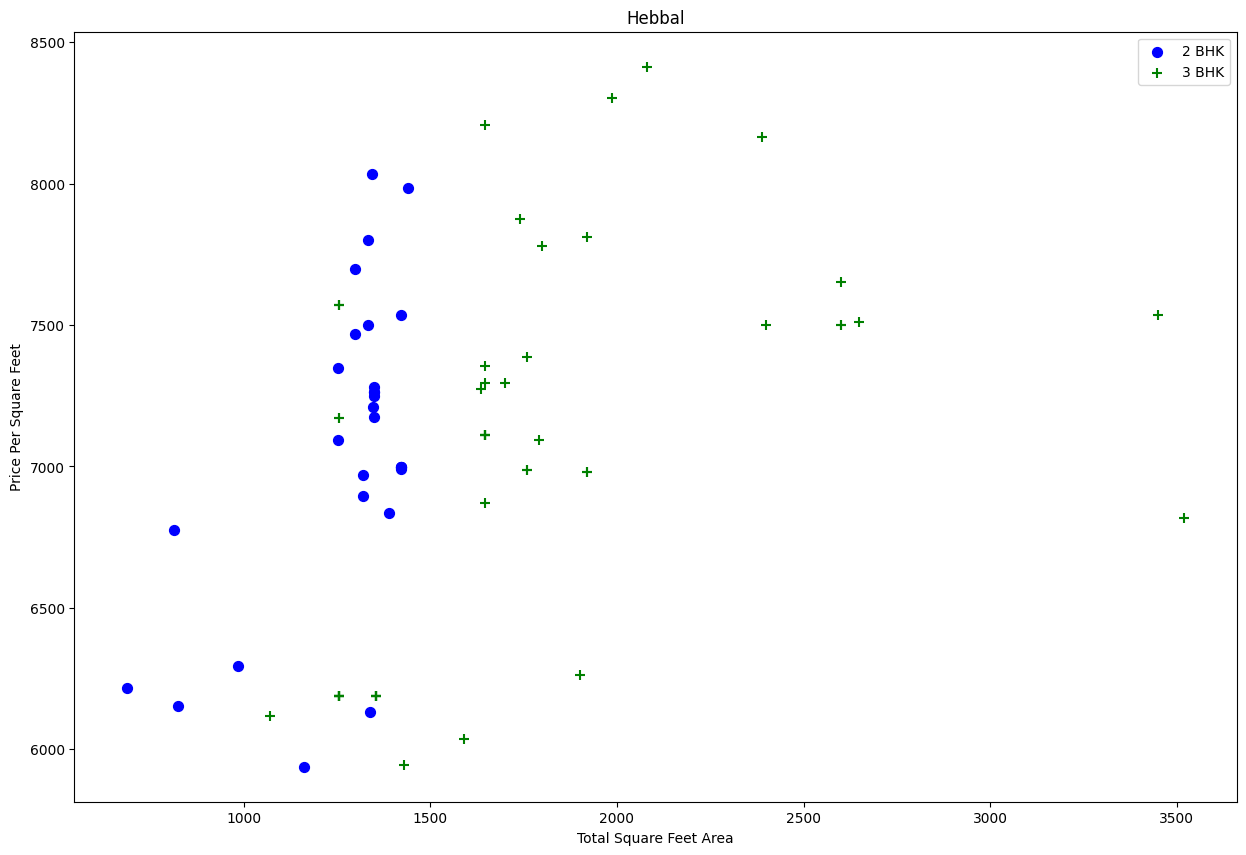

In [179]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df, "Hebbal")

In [180]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)
df.shape

(5370, 14)

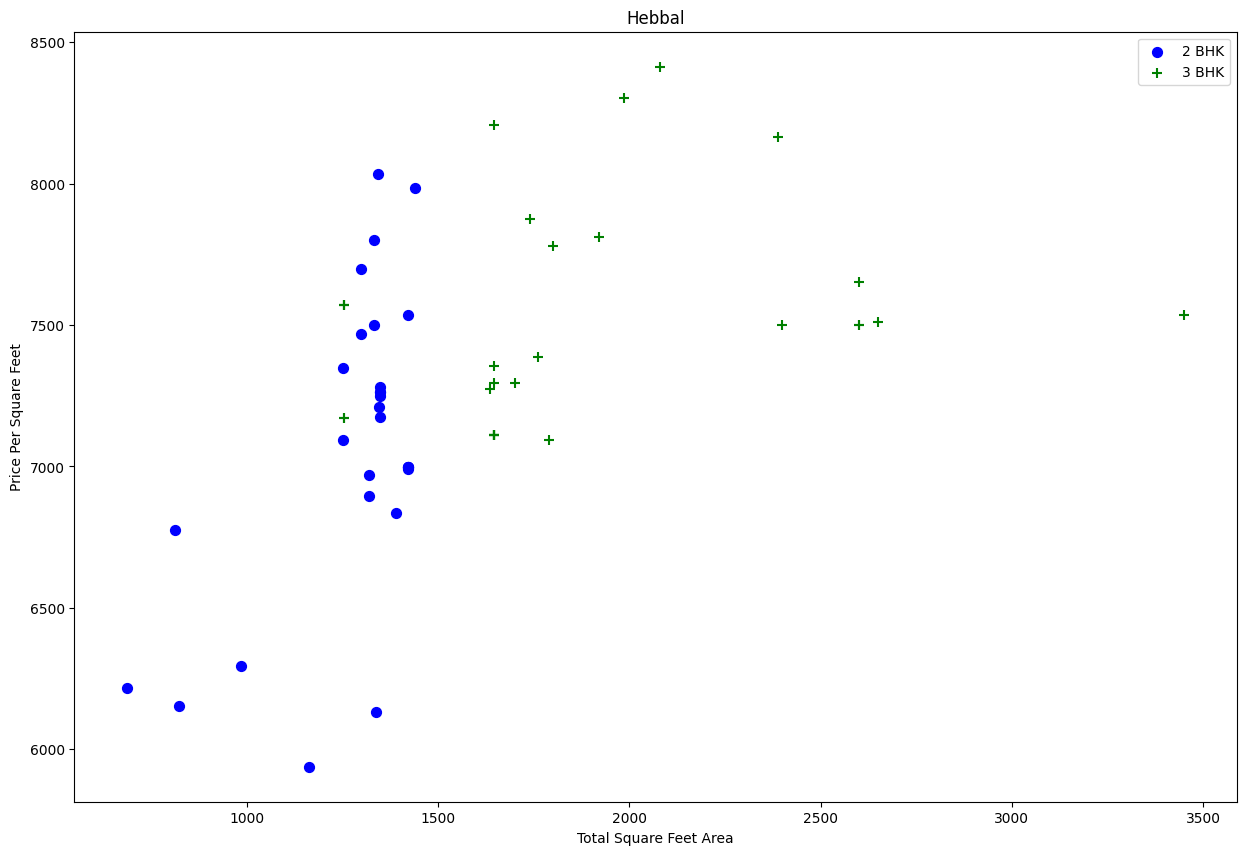

In [181]:
plot_scatter_chart(df, "Hebbal")

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 0 to 6744
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   area_type       5370 non-null   object  
 1   availability    5370 non-null   object  
 2   location        5370 non-null   object  
 3   total_sqft      5370 non-null   float64 
 4   bath            5370 non-null   float64 
 5   price           5370 non-null   float64 
 6   Lat             4929 non-null   float64 
 7   Lon             4929 non-null   float64 
 8   Nearby_Metro    5370 non-null   object  
 9   bhk             5370 non-null   float64 
 10  built_year      5370 non-null   int64   
 11  property_age    5370 non-null   int64   
 12  age_segment     5370 non-null   category
 13  price_per_sqft  5370 non-null   float64 
dtypes: category(1), float64(7), int64(2), object(4)
memory usage: 592.8+ KB


In [183]:
df = df.drop(columns=['price_per_sqft'])

In [184]:
df.head(10)

,area_type,availability,location,total_sqft,bath,price,Lat,Lon,Nearby_Metro,bhk,built_year,property_age,age_segment
0,Built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,149.0,NaN,NaN,No,3.0,2016,3,Mid
1,Super built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,150.0,NaN,NaN,No,3.0,2016,3,Mid
2,Super built-up Area,18-May,Devarachikkanahalli,1250.0,2.0,44.0,12.902018,77.601587,Yes,3.0,2018,1,New
3,Super built-up Area,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,12.902018,77.601587,Yes,3.0,2016,3,Mid
5,Super built-up Area,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
6,Super built-up Area,Ready To Move,Devarachikkanahalli,1230.0,2.0,58.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
7,Super built-up Area,Ready To Move,Devarachikkanahalli,1705.0,3.0,75.0,12.902018,77.601587,Yes,3.0,2016,3,Mid
8,Built-up Area,Ready To Move,Devarachikkanahalli,1116.0,2.0,47.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
9,Super built-up Area,Ready To Move,Devarachikkanahalli,991.0,2.0,40.0,12.902018,77.601587,Yes,2.0,2016,3,Mid


In [185]:
df = df.drop(columns=['Lat','Lon'],axis=1)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     5370 non-null   object  
 1   availability  5370 non-null   object  
 2   location      5370 non-null   object  
 3   total_sqft    5370 non-null   float64 
 4   bath          5370 non-null   float64 
 5   price         5370 non-null   float64 
 6   Nearby_Metro  5370 non-null   object  
 7   bhk           5370 non-null   float64 
 8   built_year    5370 non-null   int64   
 9   property_age  5370 non-null   int64   
 10  age_segment   5370 non-null   category
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 466.9+ KB


In [187]:
X = df.drop(columns=['price'])
y = df['price']

In [188]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [189]:
cat_col = X.select_dtypes(include=['object','category']).columns.tolist()
num_col = X.select_dtypes(include='number').columns.tolist()
cat_col

['area_type', 'availability', 'location', 'Nearby_Metro', 'age_segment']

In [190]:
std = StandardScaler()
Xtrain_num = std.fit_transform(Xtrain[num_col])
Xtest_num = std.transform(Xtest[num_col])

In [191]:
Xtrain_num = pd.DataFrame(
    Xtrain_num,
    index=Xtrain.index,
    columns= Xtrain.select_dtypes('number').columns.tolist()
)

Xtest_num = pd.DataFrame(
    Xtest_num,
    index=Xtest.index,
    columns=Xtest.select_dtypes('number').columns.tolist()
)

In [192]:
hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
Xtrain_cat = hot.fit_transform(Xtrain[cat_col])
Xtest_cat = hot.transform(Xtest[cat_col])

In [193]:
Xtrain_cat = pd.DataFrame(
    Xtrain_cat,
    index=Xtrain.index,
    columns=hot.get_feature_names_out(cat_col)
)
Xtest_cat = pd.DataFrame(
    Xtest_cat,
    index=Xtest.index,
    columns=hot.get_feature_names_out(cat_col)

)

In [194]:
Xtrain_final = pd.concat([Xtrain_num,Xtrain_cat],axis=1)
Xtest_final = pd.concat([Xtest_num,Xtest_cat],axis=1)

In [195]:
Xtrain_final.shape

(4296, 651)

In [196]:
Xtest_final.shape

(1074, 651)

In [197]:
model = LinearRegression()
model.fit(Xtrain_final,Ytrain)

LinearRegression()

In [198]:
model.score(Xtrain_final,Ytrain)

0.9586584597151575

In [199]:
model.score(Xtest_final,Ytest)

0.8277237466849875

In [200]:
model1 = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1)

In [201]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# --- Train ---
model1.fit(Xtrain_final, Ytrain)

# --- Predictions ---
y_train_pred = model1.predict(Xtrain_final)
y_test_pred = model1.predict(Xtest_final)




In [202]:
# --- Evaluation ---
train_r2 = r2_score(Ytrain, y_train_pred)
test_r2 = r2_score(Ytest, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(Ytrain, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Ytest, y_test_pred))

train_mae = mean_absolute_error(Ytrain, y_train_pred)
test_mae = mean_absolute_error(Ytest, y_test_pred)

# --- Display ---
print("📊 Random Forest Evaluation")
print(f"Train R²: {train_r2:.3f}")
print(f"Test  R²: {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test  RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test  MAE: {test_mae:.2f}")

📊 Random Forest Evaluation
Train R²: 0.973
Test  R²: 0.797
Train RMSE: 16.98
Test  RMSE: 31.55
Train MAE: 5.79
Test  MAE: 13.99


In [203]:
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import numpy as np

# # --- Model ---
# xgb_model = XGBRegressor(
#     n_estimators=300,
#     learning_rate=0.05,   # smaller step, less aggressive
#     max_depth=4,          # shallower trees
#     subsample=0.7,        # use less data per tree
#     colsample_bytree=0.7, # use fewer features per tree
#     reg_lambda=1.0,       # L2 regularization
#     reg_alpha=0.1,        # L1 regularization
#     random_state=42,
#     n_jobs=-1
# )


# # --- Train ---
# xgb_model.fit(Xtrain_final, Ytrain)

# # --- Predictions ---
# y_train_pred = xgb_model.predict(Xtrain_final)
# y_test_pred = xgb_model.predict(Xtest_final)

# # --- Evaluation ---
# train_r2 = r2_score(Ytrain, y_train_pred)
# test_r2 = r2_score(Ytest, y_test_pred)

# train_rmse = np.sqrt(mean_squared_error(Ytrain, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(Ytest, y_test_pred))

# train_mae = mean_absolute_error(Ytrain, y_train_pred)
# test_mae = mean_absolute_error(Ytest, y_test_pred)

# # --- Display ---
# print("📊 XGBoost Evaluation")
# print(f"Train R²: {train_r2:.3f}")
# print(f"Test  R²: {test_r2:.3f}")
# print(f"Train RMSE: {train_rmse:.2f}")
# print(f"Test  RMSE: {test_rmse:.2f}")
# print(f"Train MAE: {train_mae:.2f}")
# print(f"Test  MAE: {test_mae:.2f}")


HyperParamter for ElasticNet L1+L2

In [204]:
# import re
# import pandas as pd
# import numpy as np

# # Constants
# CURRENT_YEAR = 2025
# ALLOWED_AREA_TYPES = {"Super built-up Area", "Built-up Area", "Plot Area"}
# ALLOWED_YN = {"Yes", "No"}

# # Expected to exist from the training notebook:
# # - std: fitted StandardScaler (numeric columns)
# # - hot: fitted OneHotEncoder (categorical columns)
# # - num_col: list of numeric feature names
# # - cat_col: list of categorical feature names
# # - Xtrain_final: DataFrame used to train models (final column order)
# # - model1: your trained RandomForestRegressor


# def _norm_text(s: str) -> str:
#     return re.sub(r"\s+", " ", str(s)).strip()


# def _normalize_categories(area_type: str, nearby_metro: str):
#     at = _norm_text(area_type)
#     nm = _norm_text(nearby_metro).title()

#     if at not in ALLOWED_AREA_TYPES:
#         at = at.replace("  ", " ")
#         if at not in ALLOWED_AREA_TYPES:
#             at = "Super built-up Area"

#     if nm not in ALLOWED_YN:
#         nm = "No"

#     return at, nm


# def _validate_and_autocorrect(location, sqft, bath, bhk, area_type,
#                               availability, nearby_metro, built_year, property_age, age_segment):
#     msgs = []

#     area_type, nearby_metro = _normalize_categories(area_type, nearby_metro)
#     location = _norm_text(location)
#     availability = _norm_text(availability)
#     age_segment = _norm_text(age_segment)

#     sqft = int(sqft)
#     bhk = int(bhk)
#     bath = int(bath)
#     built_year = int(built_year)
#     property_age = int(property_age)

#     if sqft <= 0:
#         raise ValueError("total_sqft must be positive.")
#     if bhk <= 0:
#         raise ValueError("bhk must be positive.")
#     if bath <= 0:
#         raise ValueError("bath must be positive.")
#     if built_year <= 0 or built_year > CURRENT_YEAR:
#         raise ValueError(f"built_year must be <= {CURRENT_YEAR}.")

#     if sqft < bhk * 300:
#         new_bhk = max(1, sqft // 300)
#         msgs.append(f"⚠️ {bhk} BHK unrealistic for {sqft} sqft → adjusted to {new_bhk}.")
#         bhk = new_bhk

#     if bath > bhk + 2:
#         new_bath = bhk + 2
#         msgs.append(f"⚠️ Too many bathrooms for {bhk} BHK → adjusted to {new_bath}.")
#         bath = new_bath

#     expected_age = max(0, CURRENT_YEAR - built_year)
#     if property_age != expected_age:
#         msgs.append(f"ℹ️ Property age set to {expected_age} years (from built year {built_year}).")
#         property_age = expected_age

#     return {
#         "location": location,
#         "total_sqft": sqft,
#         "bhk": bhk,
#         "bath": bath,
#         "area_type": area_type,
#         "availability": availability,
#         "nearby_metro": nearby_metro,
#         "built_year": built_year,
#         "property_age": property_age,
#         "age_segment": age_segment
#     }, msgs


# def _transform_single_row(std, hot, num_col, cat_col, Xtrain_final, row_df: pd.DataFrame) -> pd.DataFrame:
#     X_num = std.transform(row_df[num_col])
#     X_num_df = pd.DataFrame(X_num, columns=num_col, index=row_df.index)

#     X_cat_arr = hot.transform(row_df[cat_col])
#     if hasattr(X_cat_arr, "toarray"):
#         X_cat_arr = X_cat_arr.toarray()
#     X_cat_df = pd.DataFrame(X_cat_arr, columns=hot.get_feature_names_out(cat_col), index=row_df.index)

#     X_final = pd.concat([X_num_df, X_cat_df], axis=1)

#     for col in Xtrain_final.columns:
#         if col not in X_final.columns:
#             X_final[col] = 0
#     return X_final[Xtrain_final.columns]


# def predict_price(location, sqft, bath, bhk, area_type,
#                   availability='Ready To Move', nearby_metro='No',
#                   built_year=2016, property_age=3, age_segment='Mid',
#                   sentence_prefix="Predicted"):
#     std_row, adjustments = _validate_and_autocorrect(
#         location, sqft, bath, bhk, area_type, availability, nearby_metro, built_year, property_age, age_segment
#     )

#     input_df = pd.DataFrame([{
#         'total_sqft': float(std_row['total_sqft']),
#         'bath': float(std_row['bath']),
#         'bhk': float(std_row['bhk']),
#         'built_year': int(std_row['built_year']),
#         'property_age': int(std_row['property_age']),
#         'area_type': std_row['area_type'],
#         'availability': std_row['availability'],
#         'location': std_row['location'],
#         'Nearby_Metro': std_row['nearby_metro'],
#         'age_segment': std_row['age_segment']
#     }])

#     X_final = _transform_single_row(std, hot, num_col, cat_col, Xtrain_final, input_df)

#     # 🔒 Use model1 directly
#     price_lakhs = round(float(model1.predict(X_final)[0]), 2)

#     if adjustments:
#         for msg in adjustments:
#             print(msg)
#         print(f"✅ Estimated Price: {price_lakhs} Lakhs")
#         return price_lakhs

#     bath_word = "bathroom" if int(std_row['bath']) == 1 else "bathrooms"
#     bhk_word = f"{int(std_row['bhk'])} BHK"
#     summary = (
#         f"🏠 {sentence_prefix} price for a {bhk_word} with {int(std_row['bath'])} {bath_word} "
#         f"in {std_row['area_type']} under {std_row['age_segment']} segment at {std_row['location']} "
#         f"is approximately {price_lakhs} Lakhs."
#     )
#     print(summary)
#     return summary


# def build_textgen_payload(location, sqft, bath, bhk, area_type,
#                           availability='Ready To Move', nearby_metro='No',
#                           built_year=2016, property_age=3, age_segment='Mid',
#                           allow_mention_of_corrections=False):
#     std_row, adjustments = _validate_and_autocorrect(
#         location, sqft, bath, bhk, area_type, availability, nearby_metro, built_year, property_age, age_segment
#     )

#     row_df = pd.DataFrame([{
#         'total_sqft': float(std_row['total_sqft']),
#         'bath': float(std_row['bath']),
#         'bhk': float(std_row['bhk']),
#         'built_year': int(std_row['built_year']),
#         'property_age': int(std_row['property_age']),
#         'area_type': std_row['area_type'],
#         'availability': std_row['availability'],
#         'location': std_row['location'],
#         'Nearby_Metro': std_row['nearby_metro'],
#         'age_segment': std_row['age_segment']
#     }])

#     X_final = _transform_single_row(std, hot, num_col, cat_col, Xtrain_final, row_df)

#     # 🔒 Use model1 directly
#     price_lakhs = round(float(model1.predict(X_final)[0]), 2)

#     corr_flags = {
#         "bhk_adjusted": any("BHK adjusted" in m for m in adjustments),
#         "bath_adjusted": any("bathrooms adjusted" in m for m in adjustments),
#         "age_adjusted": any("Property age set" in m for m in adjustments)
#     }

#     payload = {
#         "location": std_row['location'],
#         "total_sqft": int(std_row['total_sqft']),
#         "bhk": int(std_row['bhk']),
#         "bath": int(std_row['bath']),
#         "area_type": std_row['area_type'],
#         "age_segment": std_row['age_segment'],
#         "availability": std_row['availability'],
#         "nearby_metro": std_row['nearby_metro'],
#         "built_year": int(std_row['built_year']),
#         "property_age_years": int(std_row['property_age']),
#         "estimated_price_lakhs": price_lakhs,
#         "corrections": corr_flags,
#         "allow_mention_of_corrections": bool(allow_mention_of_corrections)
#     }

#     prompt = (
#         "Task: Write one grammatically correct sentence describing the property and its price.\n"
#         "Rules:\n"
#         "- Do not change any numbers, categories, or names.\n"
#         "- Keep it under 30 words.\n"
#         "- Use Indian English; keep currency in Lakhs.\n"
#         "- Do not add facts not in the JSON.\n\n"
#         f"Data (JSON):\n{payload}"
#     )

#     return payload, prompt


In [205]:
def predict_price_model1(location, sqft, bath, bhk, area_type,
                         availability='Ready To Move', nearby_metro='No',
                         built_year=2016, property_age=3, age_segment='Mid'):
    # --- Sanity checks ---
    if sqft < bhk * 300:
        print(f"⚠️ Warning: {bhk} BHK seems unrealistic for {sqft} sqft. Adjusting BHK...")
        bhk = max(1, sqft // 300)

    if bath > bhk + 2:
        print(f"⚠️ Warning: Too many bathrooms for {bhk} BHK. Adjusting to {bhk+2} bathrooms.")
        bath = bhk + 2

    # Auto-correct property_age
    current_year = 2025
    expected_age = current_year - built_year
    if property_age != expected_age:
        print(f"ℹ️ Adjusting property age to {expected_age} years (based on built year).")
        property_age = expected_age

    # --- Build single row input ---
    input_dict = {
        'total_sqft': [sqft],
        'bath': [bath],
        'bhk': [bhk],
        'built_year': [built_year],
        'property_age': [property_age],
        'area_type': [area_type],
        'availability': [availability],
        'location': [location],
        'Nearby_Metro': [nearby_metro],
        'age_segment': [age_segment]
    }
    input_df = pd.DataFrame(input_dict)

    # Transform
    input_num = std.transform(input_df[num_col])
    input_num_df = pd.DataFrame(input_num, columns=num_col)

    input_cat = hot.transform(input_df[cat_col])
    input_cat_df = pd.DataFrame(input_cat, columns=hot.get_feature_names_out(cat_col))

    input_final = pd.concat([input_num_df, input_cat_df], axis=1)

    for col in Xtrain_final.columns:
        if col not in input_final.columns:
            input_final[col] = 0
    input_final = input_final[Xtrain_final.columns]

    # --- Predict with RandomForest (model1) ---
    prediction = model1.predict(input_final)[0]
    print(f"✅ Estimated Price: {round(prediction, 2)} Lakhs")
    return round(prediction, 2)


In [206]:
predict_price_model1("BTM Layout", sqft=1200, bath=2, bhk=2, area_type="Super built-up  Area")


ℹ️ Adjusting property age to 9 years (based on built year).
✅ Estimated Price: 55.14 Lakhs


np.float64(55.14)

In [207]:
predict_price_model1(
    location="Electronic City",
    sqft=650,
    bath=1,
    bhk=1,
    area_type="Super built-up  Area",
    built_year=2020
)


ℹ️ Adjusting property age to 5 years (based on built year).
✅ Estimated Price: 30.18 Lakhs


np.float64(30.18)

In [208]:
predict_price_model1(
    location="BTM Layout",
    sqft=1200,
    bath=2,
    bhk=2,
    area_type="Built-up  Area",
    availability="Ready To Move",
    built_year=2015
)


ℹ️ Adjusting property age to 10 years (based on built year).
✅ Estimated Price: 66.65 Lakhs


np.float64(66.65)

In [209]:
predict_price_model1(
    location="Whitefield",
    sqft=1800,
    bath=3,
    bhk=3,
    area_type="Super built-up  Area",
    nearby_metro="Yes",
    built_year=2018
)


ℹ️ Adjusting property age to 7 years (based on built year).
✅ Estimated Price: 111.54 Lakhs


np.float64(111.54)

In [210]:
predict_price_model1(
    location="Jayanagar",
    sqft=2500,
    bath=4,
    bhk=4,
    area_type="Plot  Area",
    built_year=2005
)


ℹ️ Adjusting property age to 20 years (based on built year).
✅ Estimated Price: 152.98 Lakhs


np.float64(152.98)

In [211]:
predict_price_model1(
    location="Koramangala",
    sqft=3000,
    bath=4,
    bhk=4,
    area_type="Super built-up  Area",
    availability="Under Construction",
    built_year=2024
)


ℹ️ Adjusting property age to 1 years (based on built year).
✅ Estimated Price: 243.28 Lakhs


np.float64(243.28)

In [212]:
predict_price_model1(
    location="Koramangala",
    sqft=10000,
    bhk=8,
    bath=10,
    area_type="Super built-up  Area",
    availability="Ready To Move",
    built_year=2023
)


ℹ️ Adjusting property age to 2 years (based on built year).
✅ Estimated Price: 1101.5 Lakhs


np.float64(1101.5)

In [213]:
# 🔹 2. Small Apartment in Prime Area
predict_price_model1(
    location="Whitefield",
    sqft=500,
    bhk=1,
    bath=1,
    area_type="Built-up  Area",
    availability="Ready To Move",
    built_year=2018
)

ℹ️ Adjusting property age to 7 years (based on built year).
✅ Estimated Price: 23.89 Lakhs


np.float64(23.89)

In [214]:
predict_price_model1(
    location="Kengeri",
    sqft=4000,
    bhk=5,
    bath=6,
    area_type="Super built-up  Area",
    availability="Ready To Move",
    built_year=2015
)

ℹ️ Adjusting property age to 10 years (based on built year).
✅ Estimated Price: 256.97 Lakhs


np.float64(256.97)

In [215]:
# Banashankari property with metro nearby
predict_price_model1(
    location="Banashankari",
    sqft=2000,
    bhk=3,
    bath=3,
    area_type="Super built-up  Area",
    availability="Ready To Move",
    built_year=2016,
    nearby_metro="Yes"
)


ℹ️ Adjusting property age to 9 years (based on built year).
✅ Estimated Price: 120.55 Lakhs


np.float64(120.55)

In [216]:
predict_price_model1(
    location="MG Road",
    sqft=2500,
    bhk=4,
    bath=4,
    area_type="Super built-up  Area",
    availability="Ready To Move",
    built_year=2022
)


✅ Estimated Price: 162.81 Lakhs


np.float64(162.81)

In [217]:
# Export the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model1,f)


In [218]:
# Export location and column information to a file that will be useful later on in our prediction application
import json

columns = {
    'data_columns': list(Xtrain_final.columns)  # keep original case
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))


In [219]:
import pickle
with open("std_scaler.pickle", "wb") as f:
    pickle.dump(std, f)
